In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

from cosmopy import cosmoLCDM
from cosmocl import theocl

In [2]:
rcParams.update({'font.size': 22})

In [3]:
cosmo = cosmoLCDM.cosmoLCDM(H0=67.66, Om0=0.3111, Ob0=0.04897, Tcmb0=2.7255, As=2.105e-9, ns=0.9665)
cosmo.gen_interp_chiz(zmin=0, zmax=1101, dz=0.01)
# the following step can be time consuming
cosmo.gen_interp_D_z(zmin=0, zmax=1101, dz=0.1)

>> self.interp_chi2z(chi) and self.interp_z2chi(z) generated
>> for z in [0, 1101] with dz=0.01 interpolated with linear
>> self.interp_D_z(z) generated for z in [0, 1101] with dz=0.1 interpolated with linear


In [4]:
z_g1, z_g2 = 1.4, 1.6 # redshift bin of the galaxy survey

def fg(z):
    '''z: ndarray'''
    res = np.zeros(z.shape[0])
    res[(z >= z_g1) & (z <= z_g2)] = 1./(z_g2-z_g1)
    return res

def bg(z):
    return 2

In [5]:
ccl = theocl.ccl(cosmo)

>> Number of CPUs: 24


In [6]:
ccl.init_all(fn_kchi='/mount/citadel1/yz4035/fnl/jls/kchi_sample1.npz',
             fn_jls='/mount/citadel1/yz4035/fnl/jls/jls_tab1.npz',
             fg=fg, bg=bg)

In [7]:
clkg = ccl.c_clkg()

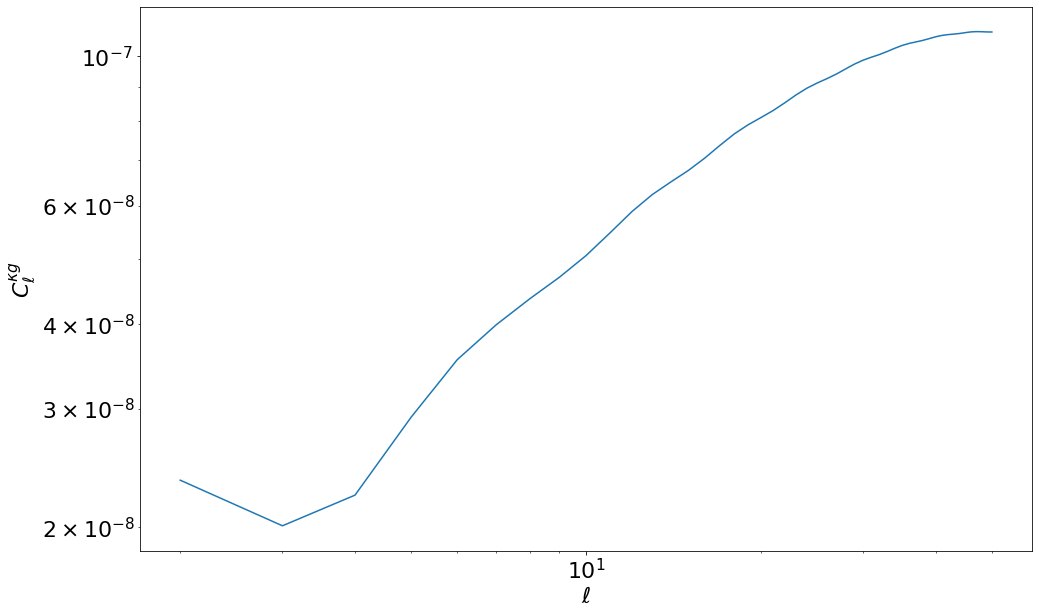

In [8]:
fig, (ax) = plt.subplots(1, 1, figsize=(16, 10))

ax.loglog(ccl.ells, clkg)

ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C_\ell^{\kappa g}$')

plt.show()